In [1]:
import hepytorch as hep
import logging

logging.basicConfig(
    format="%(asctime)s - %(levelname)s - %(message)s",
    style="%",
    datefmt="%Y-%m-%d %H:%M:%S",
    level=logging.INFO,
)

myHEP = hep.HEPTorch('./recipes/mass_estimator_cnnfcff.json')

2024-11-20 10:14:07 - INFO - Using cpu device
2024-11-20 10:14:07 - INFO - Using the following configuration
{
  "data": {
    "name": "CSVLoader",
    "kwargs": {
      "path": "./data/toymc/ttbar_1_30ll_test.csv",
      "format": "csv"
    }
  },
  "preprocessor": {
    "name": "ObservablesPreprocessor",
    "kwargs": {}
  },
  "model": {
    "name": "ConvolutionalNeuralNetworkFullyConnectedFeedForward",
    "kwargs": {
      "input_features": 20,
      "hidden_features": 128,
      "batch_size": 30,
      "output_features": 2
    }
  },
  "loss_fn": {
    "name": "CustomWeightedMSELoss",
    "kwargs": {}
  },
  "optimizer": {
    "name": "SGD",
    "kwargs": {
      "learning_rate": 1e-05,
      "momentum": 0.9
    }
  },
  "trainer": {
    "name": "BasicTrainer",
    "kwargs": {
      "epochs": 10,
      "batch_size": 20,
      "regularization_type": "l2",
      "lambda_reg": 1e-05
    }
  }
}
2024-11-20 10:14:08 - INFO - Data shape: (25835, 50)
2024-11-20 10:14:08 - INFO - Data co

In [2]:
result = myHEP.train()

Epoch 0, loss: 0.912471911236168
Epoch 1, loss: 0.9119423817730006
Epoch 2, loss: 0.912126058315271
Epoch 3, loss: 0.9115227629558386
Epoch 4, loss: 0.9120596844781546
Epoch 5, loss: 0.9116976430101414
Epoch 6, loss: 0.9122285841508347
Epoch 7, loss: 0.9118438202297293
Epoch 8, loss: 0.9120583784119959
Epoch 9, loss: 0.9110420839446113


In [3]:
import matplotlib.pyplot as plt
top_mass = myHEP.model(myHEP.data).detach().numpy()
true_mass = myHEP.target.detach().numpy()
print(top_mass)

[[0.12443119]
 [0.11809761]
 [0.13310614]
 ...
 [0.11653881]
 [0.11165284]
 [0.1221112 ]]


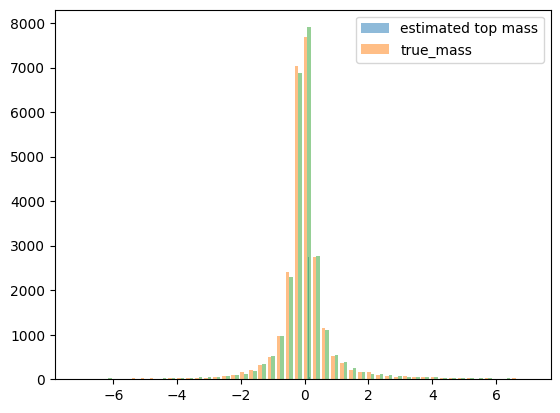

In [4]:
# draw two histograms of top_mass and true_mass
plt.hist(top_mass, bins=50, alpha=0.5, label='estimated top mass')
plt.hist(true_mass, bins=50, alpha=0.5, label='true_mass')
plt.legend(loc='upper right')
plt.show()